In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## for hypothesis testing
import scipy.stats as stats

## for modelling
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
## Business problem
## predict tip based on other features.

## y variable - tip
## X variables - total_bill, sex, smoker, day, time, size

In [5]:
## Encoding the variables

In [6]:
tips.select_dtypes('category')

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [7]:
pd.get_dummies(tips.select_dtypes('category'))

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,1,0,0,1,0,0,1
240,0,1,1,0,0,0,1,0,0,1
241,1,0,1,0,0,0,1,0,0,1
242,1,0,0,1,0,0,1,0,0,1


In [8]:
## one hot encode
tips_categorical_enc = pd.get_dummies(tips.select_dtypes('category'), drop_first=True)

In [9]:
tips_categorical_enc

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1
...,...,...,...,...,...,...
239,0,1,0,1,0,1
240,1,0,0,1,0,1
241,0,0,0,1,0,1
242,0,1,0,1,0,1


In [10]:
tips_numeric = tips.select_dtypes('number')

In [11]:
final_data = pd.concat([tips_numeric, tips_categorical_enc], axis=1)

In [12]:
final_data.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [22]:
## split the data into train and test

In [13]:
## sci-kit learn.

from sklearn.model_selection import train_test_split

In [14]:
train_data, test_data = train_test_split(final_data, test_size=0.2, random_state=1)

In [15]:
train_data

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
154,19.77,2.00,4,0,1,0,0,1,1
167,31.71,4.50,4,0,1,0,0,1,1
110,14.00,3.00,2,0,1,0,1,0,1
225,16.27,2.50,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
137,14.15,2.00,2,1,1,0,0,0,0
72,26.86,3.14,2,1,0,0,1,0,1
140,17.47,3.50,2,1,1,0,0,0,0
235,10.07,1.25,2,0,1,0,1,0,1


In [16]:
len(test_data)

49

In [17]:
test_data.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
67,3.07,1.00,1,1,0,0,1,0,1
243,18.78,3.00,2,1,1,0,0,0,1
206,26.59,3.41,3,0,0,0,1,0,1
122,14.26,2.50,2,0,1,0,0,0,0
89,21.16,3.00,2,0,1,0,0,0,0


In [33]:
import statsmodels.formula.api as smf

In [ ]:
## Linear Regression

## 1. model = smf.ols(formula, data)

## formula: y ~ x1 + x2 + x3 ....

## 2. model = model.fit()

## 3. model.predict()

## 4. model.summary()

In [18]:
train_data

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
154,19.77,2.00,4,0,1,0,0,1,1
167,31.71,4.50,4,0,1,0,0,1,1
110,14.00,3.00,2,0,1,0,1,0,1
225,16.27,2.50,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
137,14.15,2.00,2,1,1,0,0,0,0
72,26.86,3.14,2,1,0,0,1,0,1
140,17.47,3.50,2,1,1,0,0,0,0
235,10.07,1.25,2,0,1,0,1,0,1


In [23]:
' + '.join(list(train_data.columns))

'total_bill + tip + size + sex_Female + smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner'

In [24]:
formula1 = 'tip ~ total_bill + size + sex_Female + smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner'

In [30]:
model1 = smf.ols(formula1, train_data).fit()

In [31]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     18.39
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           3.75e-20
Time:                        14:27:54   Log-Likelihood:                -271.87
No. Observations:                 195   AIC:                             561.7
Df Residuals:                     186   BIC:                             591.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6486      0.277      2.343      

In [32]:
## p value: Assuming my null hypothesis is true, what is the probability of me getting the data point that i got.

In [33]:
## p value is lower: the variable is more significant

In [34]:
formula2 = 'tip ~ total_bill + size + smoker_No + day_Fri + day_Sat + day_Sun + time_Dinner'

In [36]:
model2 = smf.ols(formula2, train_data).fit()

In [37]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           8.18e-21
Time:                        14:58:48   Log-Likelihood:                -271.92
No. Observations:                 195   AIC:                             559.8
Df Residuals:                     187   BIC:                             586.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6784      0.259      2.620      

In [38]:
formula3 = 'tip ~ total_bill + size'

In [39]:
model3 = smf.ols(formula3, train_data).fit()

In [40]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     74.26
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.29e-24
Time:                        15:00:04   Log-Likelihood:                -272.82
No. Observations:                 195   AIC:                             551.6
Df Residuals:                     192   BIC:                             561.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7666      0.206      3.717      0.0

In [41]:
## tip = 0.7666 + 0.0777 * total_bill + 0.2536 * size

In [42]:
## y    x1          r2: 50%
## y    x1, x2      r2: 75%
## y    x1, x2, x3  r2: 77%
## y    x1, x2, x3, x4  r2: 78%

In [43]:
## adjusted r2 is function of r2 and the number of independent variables.

## difference between r2 and adjusted r2: it shouldn't be more than 5%.



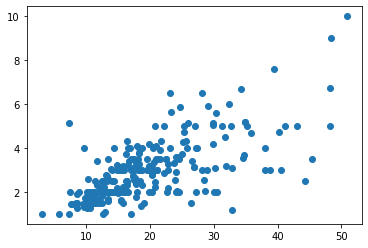

In [44]:
plt.scatter(tips.total_bill, tips.tip)

In [47]:
train_predictions = model3.predict()

In [48]:
test_predictions = model3.predict(test_data)

In [60]:
test_data['predictions'] = test_predictions

In [52]:
train_data['predictions'] = train_predictions

In [53]:
train_data

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,predictions
0,16.99,1.01,2,1,1,0,0,1,1,2.594387
154,19.77,2.00,4,0,1,0,0,1,1,3.317669
167,31.71,4.50,4,0,1,0,0,1,1,4.245765
110,14.00,3.00,2,0,1,0,1,0,1,2.361974
225,16.27,2.50,2,1,0,1,0,0,0,2.538421
...,...,...,...,...,...,...,...,...,...,...
137,14.15,2.00,2,1,1,0,0,0,0,2.373634
72,26.86,3.14,2,1,0,0,1,0,1,3.361582
140,17.47,3.50,2,1,1,0,0,0,0,2.631697
235,10.07,1.25,2,0,1,0,1,0,1,2.056495


In [55]:
train_data[['tip', 'predictions']].to_excel('d:/data/modelling_predictions.xlsx')

In [56]:
import sklearn.metrics as metrics

In [57]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [58]:
## training error

mean_absolute_percentage_error(train_data.tip, train_data.predictions)

0.2878686131929886

In [61]:
mean_absolute_percentage_error(test_data.tip, test_data.predictions)

0.24068063499759676

In [64]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

## Challenges

1. Linearity: Linear Regression assumes linearity. So if there is no linearity in your data, then don't go
    for linear regression.
    
    
2. Outliers: As a preprocessing step, linear regression demands that outliers are taken care of.

3. Missing values

4. Multi-collinearity: X variables themselves are related to each other.

        for example: Age and Experience could themselves be related to each other. This violates
         our assumption of X variables being independent.
         
         
         How to detect it?
         
             i can take X variables 2 at a time and can compute their correlation.
             
             variance inflation factor: 
             
                 formula = 1 / (1-r^2)
                 
                 we run independent regression models taking one independent as the y and the other
                 indenpendent as Xs.
             
             
         
         
         
         How to deal with it?
         
             1. Feature engineering. Either you change the variable by coming up KPI.
             2. just drop the related variables.
             
             
             
             


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
variance_inflation_factor?

In [67]:
train_data

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,predictions
0,16.99,1.01,2,1,1,0,0,1,1,2.594387
154,19.77,2.00,4,0,1,0,0,1,1,3.317669
167,31.71,4.50,4,0,1,0,0,1,1,4.245765
110,14.00,3.00,2,0,1,0,1,0,1,2.361974
225,16.27,2.50,2,1,0,1,0,0,0,2.538421
...,...,...,...,...,...,...,...,...,...,...
137,14.15,2.00,2,1,1,0,0,0,0,2.373634
72,26.86,3.14,2,1,0,0,1,0,1,3.361582
140,17.47,3.50,2,1,1,0,0,0,0,2.631697
235,10.07,1.25,2,0,1,0,1,0,1,2.056495


In [74]:
variance_inflation_factor(train_data.values, 0)

95.98192068572502

In [71]:
train_data.values

array([[16.99      ,  1.01      ,  2.        , ...,  1.        ,
         1.        ,  2.59438677],
       [19.77      ,  2.        ,  4.        , ...,  1.        ,
         1.        ,  3.31766875],
       [31.71      ,  4.5       ,  4.        , ...,  1.        ,
         1.        ,  4.24576464],
       ...,
       [17.47      ,  3.5       ,  2.        , ...,  0.        ,
         0.        ,  2.63169716],
       [10.07      ,  1.25      ,  2.        , ...,  0.        ,
         1.        ,  2.05649535],
       [16.93      ,  3.07      ,  3.        , ...,  0.        ,
         1.        ,  2.8433193 ]])

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score?